# Guidelines for Phugoid Curves

##### This Note serves to create a guideline for writing codes similar to ones taught in this section. The different parts of code are described: 
1. Importing Libraries 
2. Defining & discretizing the grid, & time steps 
3. Defining the functions, operators & matrices for the differential equations  
4. Defining the Initial Conditions 
5. Defining the for loop marching numerical scheme 
6. Defining an array of a number of time steps & calculating solutions for different time steps 
7. Evaulating a relation between the L1 norm & time step value to evaluate the order of convergence. **(with exact solution if available)

### 1. Improting Libraries 

- `import numpy as np`
- `from matplotlib import pyplot as plt `

- `%matplotlib inline`  **(Use this to not have to write plt.show() everytime)** 

### 2. Defining & discretizing the grid & time steps 

It's always a good idea to define the simulation time, and the time steps early on for the cases described in the phugoid section. This will be key in defining the empty solution grid for our variables, for th required time grid. \
Here's the parameters we need to define: 

- Simulation Time: **(Can be floating point or int type)** \
`T=100.0`
- Time step Size: \
`dt=0.01 ; or ; dt_values=[0.1, 0.05, 0.01, 0.005, 0.001]`
- Defining no. of time steps: **(The no. of time steps need to be an integer]** \
`N=int(T/dt)+1`
- For comparing with exact solutions available for a problem in the form of a equation we can define a time grid with: \
`t_grid=np.linspace(0.0, T, num=N)`


### 3. Defining the initial conditions 

- Define a solution dataset to be appended with each iteration & respective time step size: \
`u_values=[]`
- Defining solution array for passing onto a function solving for a single time step:(The no. of columns being the no. of variables we want to evaluate) \
`u=np.empty((N, 4))` 
- Defining the initial condition by defining the row 1:(The columns being the variables defined as intial conditions) \
`u[0]=np.array([v0, vt, z0, b0])`


### 4. Defining the functions to implement the numerical schemes on the Solutions arrays 

#### - Plotting Trajectory with the Ideal case of zero Drag

$$
\begin{equation}
z(t)'' + \frac{g \,z(t)}{z_t}=g
\end{equation}
$$
$$
\begin{eqnarray}
z'(t) &=& b(t)\\
b'(t) &=& g\left(1-\frac{z(t)}{z_t}\right)
\end{eqnarray}
$$

In [ ]:
With the initial conditions initialised as u[0]=np.array[z0, b0]

def euler_nodrag(u[0], u[1], g, dt)
for n in range (N):
    u[n+1, 1]= g*dt-g*u[n, 0]/zt*dt+u[n, 1]
    u[n+1, 0]=u[n, 0] + dt*u[n, 1]

In [ ]:
- Defining functions to evaluate the exact soltutions on the defined time grid:
y_exact = (b0 * (zt / g)**0.5 * numpy.sin((g / zt)**0.5 * t) + (z0 - zt) * numpy.cos((g / zt)**0.5 * t) + zt)

In [85]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline

In [86]:
T = 100.0
dt_values = [0.1, 0.05, 0.01, 0.005, 0.001] 
Nmax = int(T / dt_values[-1]) + 1 
t = np.linspace(0.0, T, num=Nmax)

In [87]:
z0 = 100.0  # altitude
b0 = 10.0  # upward velocity resulting from gust
x0=0
zt = 100.0  # trim altitude
g = 9.81  # acceleration due to gravity
vx=100.0
s=b0**2+vx**2
v0=np.sqrt(s)
theta0=np.arctan(b0/vx)
u_values=[]
u = np.empty((N, 4))
u[0]=[v0, theta0, x0, z0, b0]



In [88]:
def euler_nodrag(u, g, dt):
    for n in range (N-1):
        u[n+1, 4]= g*dt-g*u[n, 0]/zt*dt+u[n, 1]
        u[n+1, 3]=u[n, 0] + dt*u[n, 1]
    return u

In [89]:
for dt in dt_values:
    N = int(T / dt) + 1 
    u = np.empty((N, 2))
    u[0]=[z0, b0]
    u=euler_nodrag(u, g, dt)
    u_values.append(u)
    

In [90]:
z_exact = (b0 * (zt / g)**0.5 * np.sin((g / zt)**0.5 * t) + (z0 - zt) * np.cos((g / zt)**0.5 * t) + zt)

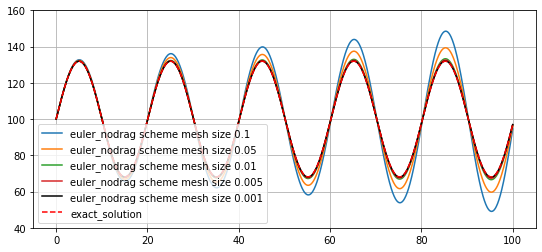

In [112]:
pyplot.figure(figsize=(9.0, 4.0))
pyplot.ylim(40, 160)
pyplot.plot(t[::int(dt_values[0]/dt_values[-1])], u_values[0][:, 0], label='euler_nodrag scheme mesh size 0.1')
pyplot.plot(t[::int(dt_values[1]/dt_values[-1])], u_values[1][:, 0], label='euler_nodrag scheme mesh size 0.05')
pyplot.plot(t[::int(dt_values[2]/dt_values[-1])], u_values[2][:, 0], label='euler_nodrag scheme mesh size 0.01')
pyplot.plot(t[::int(dt_values[3]/dt_values[-1])], u_values[3][:, 0], label='euler_nodrag scheme mesh size 0.005')
pyplot.plot(t[::int(dt_values[4]/dt_values[-1])], u_values[4][:, 0], label='euler_nodrag scheme mesh size 0.001', color='black')
pyplot.plot(t, z_exact, label='exact_solution', color='red', linestyle='--')
pyplot.grid()
pyplot.legend()

In [139]:
def l1_error(u, dt, z_exact):
    l1=dt*np.sum(np.abs(u-z_exact[::int(dt/dt_values[-1])]))
    return l1

In [179]:
def diff(ucoarse, ufine, dt):
    ratio=round(len(ufine)/len(ucoarse))
    rel_diff=dt*np.sum(np.abs(ucoarse-ufine[::ratio]))
    return rel_diff

In [180]:
l1_errorvalues=[]
for i, dt in enumerate(dt_values):
    l1=l1_error(u_values[i][:,0], dt, z_exact)
    l1_errorvalues.append(l1)
    

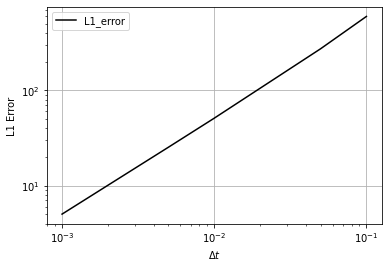

In [202]:
pyplot.loglog(dt_values, l1_errorvalues, label='L1_error', color='black')
pyplot.grid()
pyplot.xlabel('$\Delta t$')
pyplot.ylabel('L1 Error')
pyplot.legend()

In [203]:
f2_f1 = diff(u_values[0][:, 0], u_values[2][:, 0], dt_values[2])
f3_f2 = diff(u_values[2][:, 0], u_values[4][:, 0], dt_values[4])
p = np.log(f2_f1/f3_f2)/np.log(dt_values[2]/dt_values[4])
print('Observed order of convergence: p = {:.3f}'.format(p))

Observed order of convergence: p = 1.074
